In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Auto Insurance Fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
data = data.replace('?',np.NaN)

In [6]:
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)
data['property_damage'].fillna('NO', inplace = True)
data['police_report_available'].fillna('NO', inplace = True)

In [7]:
data.drop(columns=['_c39'], inplace=True)

In [8]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


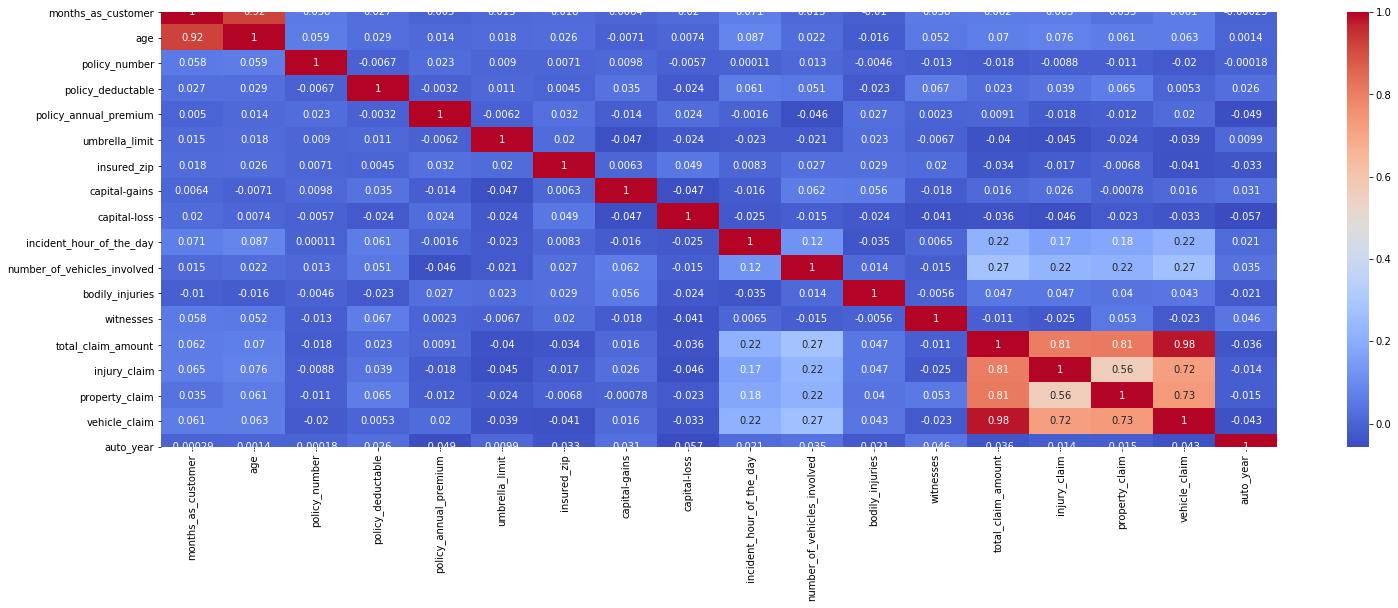

In [10]:
plt.figure(figsize=(25, 8))
corr=data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

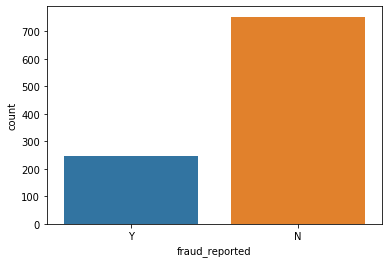

In [11]:
# Analyzing the target variable
# The data is highly imbalanced
sns.countplot(data['fraud_reported'])
plt.show()

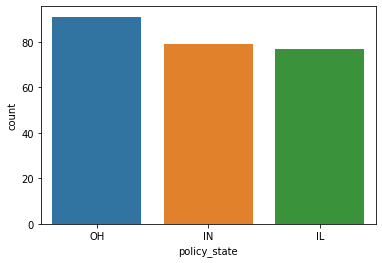

In [12]:
# Most of the farudulent claims are reported from Ohio
sns.countplot(x='policy_state', data=data.loc[data['fraud_reported']=='Y'])
plt.show()

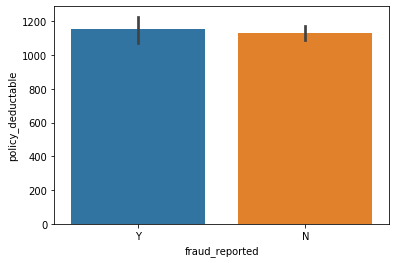

In [13]:
# The frauds reported by policy deductable are not significantly different
sns.barplot(x='fraud_reported', y='policy_deductable', data=data)
plt.show()

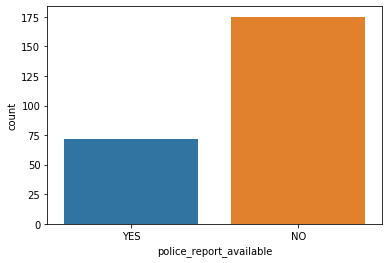

In [14]:
# The maximum number of fraudulent claims were not supported by police reports. 
# To avoid fraudulent claims, police report must be accompanied
sns.countplot(x='police_report_available', data=data.loc[data['fraud_reported']=='Y'])
plt.show()

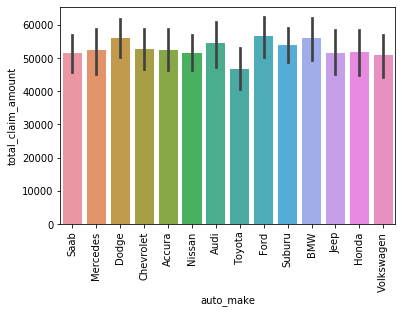

In [15]:
# Most of the cars had claim amount greater than the average claim amount except Toyota
plt.xticks(rotation=90)
sns.barplot(x='auto_make', y='total_claim_amount', data=data)
plt.show()

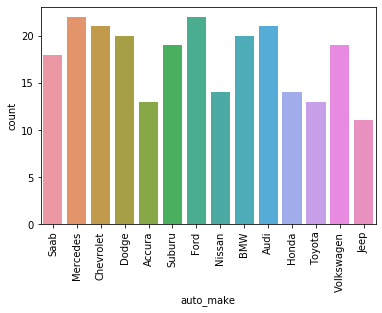

In [16]:
# Most of the fraudulent cases belonged to Mercedes and Ford cars
plt.xticks(rotation=90)
sns.countplot(x='auto_make', data=data.loc[data['fraud_reported']=='Y'])
plt.show()

In [17]:
x = data.drop(columns=['policy_state', 'policy_bind_date', 'incident_date', 'auto_model', 'policy_csl', 'policy_number', 'auto_year', 'fraud_reported'])
y = data['fraud_reported']

In [18]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

In [19]:
# Removing skewness from data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [20]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.421516
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount             0.533008
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                  0.488948
dtype: float64

In [21]:
y

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [22]:
# There are categorical variables in the dataset
x=pd.get_dummies(x,drop_first=True)
x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0.000000,13.052226,53300,0,5,0.693147,...,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,15.424949,13.056602,0,0,8,0.693147,...,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,15.424949,12.973011,35100,0,7,1.386294,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,15.607270,13.318124,48900,-62400,5,0.693147,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,15.607270,13.322373,66000,-46000,20,0.693147,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0.000000,12.974536,0,0,20,0.693147,...,0,0,1,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0.000000,13.318223,70900,0,23,0.693147,...,0,0,0,0,0,0,0,0,0,1
997,130,34,500,1383.49,14.914123,13.000869,35100,0,4,1.386294,...,0,0,0,0,0,0,0,1,0,0
998,458,62,2000,1356.92,15.424949,12.998420,0,0,2,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,1.078140,0.990836,-0.222383,0.616705,-0.501768,-0.462135,1.011331,0.953851,-0.956261,-0.834826,...,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,3.391165,-0.294884,-0.274352,-0.270114
1,0.208995,0.334073,1.412784,-0.242521,1.983552,-0.430025,-0.901927,0.953851,-0.524475,-0.834826,...,-0.294884,-0.278543,-0.241249,-0.267976,3.792706,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
2,-0.608002,-1.088913,1.412784,0.642233,1.983552,-1.043476,0.358023,0.953851,-0.668404,1.169421,...,3.391165,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
3,0.452355,0.224613,1.412784,0.652886,2.012928,1.489236,0.853388,-1.267577,-0.956261,-0.834826,...,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
4,0.208995,0.552994,-0.222383,1.341980,2.012928,1.520414,1.467210,-0.683741,1.202666,-0.834826,...,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,-0.222383,0.222884,-0.501768,-1.032289,-0.901927,0.953851,1.202666,-0.834826,...,-0.294884,-0.278543,4.145096,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
996,0.704407,0.224613,-0.222383,0.739141,-0.501768,1.489960,1.643100,0.953851,1.634452,-0.834826,...,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,3.702146
997,-0.642767,-0.541611,-1.039966,0.520739,1.901246,-0.839036,0.358023,0.953851,-1.100189,1.169421,...,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,3.391165,-0.274352,-0.270114
998,2.208028,2.523284,1.412784,0.411866,1.983552,-0.857007,-0.901927,0.953851,-1.388046,-0.834826,...,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114


In [24]:
x.isnull().sum()

months_as_customer       0
age                      0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           1
                        ..
auto_make_Nissan         0
auto_make_Saab           0
auto_make_Suburu         0
auto_make_Toyota         0
auto_make_Volkswagen     0
Length: 1098, dtype: int64

In [25]:
x.fillna(x.mean(), inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [45]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
def maxrocaucscore(cm,x,y):
    max_roc_auc=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=roc_auc_score(y_test,y_pred)
        if fsc>max_roc_auc:
            max_roc_auc=fsc
            rs=r_state
    print('Maximum roc_auc score is :', max_roc_auc, 'at random state :', rs)

In [46]:
# Using Logistic regression
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='roc_auc')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 100, 'penalty': 'l1'}


In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100, penalty='l1')
maxrocaucscore(lr,x,y)

Maximum roc_auc score is : 0.729693201784025 at random state : 1


In [48]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for LogisticRegression score is:', cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for LogisticRegression score is: 0.8705255665179978
Standard deviation in roc_auc score is:  0.045073939659108546


In [49]:
# Using Decision Tree Classifier
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='roc_auc')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=4)
maxrocaucscore(dtc,x,y)

Maximum roc_auc score is : 0.913096364373564 at random state : 6


In [51]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Decision Tree Classifier is: 0.8558484479884669
Standard deviation in roc_auc score is:  0.044615992440359416


In [52]:
# Using SVC
from sklearn.svm import SVC
svc=SVC()
hyperparameterssvc = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf','poly','linear']}
gridsvc=GridSearchCV(svc, hyperparameterssvc, cv=5, scoring='roc_auc', n_jobs=-1)
gridsvc.fit(x,y)
print(gridsvc.best_params_)

{'C': 0.01, 'kernel': 'linear'}


In [53]:
from sklearn.svm import SVC
svc=SVC(C=0.01, kernel='linear')
maxrocaucscore(svc,x,y)

Maximum roc_auc score is : 0.6260305446681984 at random state : 54


In [54]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for SVC is:', cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for SVC is: 0.8412268324548362
Standard deviation in roc_auc score is:  0.05162000927414527


In [55]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parametersknn={'n_neighbors':[5,6,7,8,9,10]}
knn1 = GridSearchCV(knn, parametersknn, cv=5,scoring="roc_auc")
knn1.fit(x,y)
knn1.best_params_

{'n_neighbors': 10}

In [56]:
knn=KNeighborsClassifier(n_neighbors=10)
maxrocaucscore(knn,x,y)

Maximum roc_auc score is : 0.5 at random state : 0


In [57]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for KNN is:', cross_val_score(knn,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(knn,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for KNN is: 0.7320317159976573
Standard deviation in roc_auc score is:  0.03127848871228903


In [58]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="roc_auc")
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 300}

In [59]:
rfc=RandomForestClassifier(n_estimators=300)
maxrocaucscore(rfc,x,y)

Maximum roc_auc score is : 0.5716988782267873 at random state : 56


In [60]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Random Forest Classifier is: 0.8498812452133171
Standard deviation in roc_auc score is:  0.04622041015457521


In [61]:
# Among all the models, Logistic Regression is the best performing model
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 1,test_size=0.20,stratify=y)
lr=LogisticRegression(C=100, penalty='l1')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       151
           1       0.51      0.80      0.62        49

    accuracy                           0.77       200
   macro avg       0.72      0.78      0.73       200
weighted avg       0.82      0.77      0.78       200

Confusion matrix 
 [[114  37]
 [ 10  39]]


In [62]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(lr, 'Auto Insurance Claim Fraud.pkl')

['Auto Insurance Claim Fraud.pkl']